# Homework 1
The goal of this homework is to make sure that you have your environment set up, and get a little bit of practice with pytorch.

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

import torch
print("Using torch", torch.__version__)

Using torch 2.4.0+cu121


Generally, we want all of our code to be reproducible, so we're going to set a random number generator seed. This will make sure that our random initializations are the same every time we run the code. This is important for reproducibility. Why? Well, if you get some kind of error then this error will deterministically happen which makes debugging easier for you and anyone else who might try to help you!

In [3]:
torch.manual_seed(0)

# An introduction to PyTorch
You can think of PyTorch as Numpy + autodifferentiation. That means, it has a numpy-like syntax but also allows you to take derivatives of arbitrary differentiable functions. 

The core object in PyTorch is the Tensor. A Tensor is the equivalent of a numpy array but with a few extra features. For example, you can move a tensor to the GPU to speed up computation and operation on tensors are tracked to build a computation graph. This allows you to take the derivative of a tensor with respect to some other tensor.

## Playing around with tensors
Here are some basic tensor operations that you'll use pretty often
- `torch.zeros`: Creates a tensor filled with zeros
- `torch.ones`: Creates a tensor filled with ones
- `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
- `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
- `torch.arange`: Creates a tensor containing the values in the indicated range
- `torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [4]:
## Some examples
print('a tensor filled with 1, 2, 3')
x = torch.tensor([1, 2, 3])
print(x)
print(x.size())

print(' a 2x3 tensor filled with zeros')
x = torch.zeros((2, 3))
print(x)
print(x.size())

a tensor filled with 1, 2, 3
tensor([1, 2, 3])
torch.Size([3])
 a 2x3 tensor filled with zeros
tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.Size([2, 3])


## Interoperability with numpy
Often-times we'll want to do a bunch of pytorch operations but in the end export things to Numpy so that we can plot in matplotlib or do some other operation. PyTorch tensors can be converted to numpy arrays and vice-versa very easily.

- `torch.Tensor.numpy()`: Converts a torch Tensor to a numpy array
- `torch.Tensor.from_numpy()`: Converts a numpy array to a torch Tensor
so for example if you have a torch tensor `a` you can call `a.numpy()` to get a numpy array.
or if you have a numpy tensor b you can call `torch.from_numpy(b)` to get a torch tensor or `torch.tensor(b)`.

In [5]:
import numpy as np
b = np.array([1, 2, 3])
x = torch.tensor(b)
x = torch.from_numpy(b)
c = x.numpy()

## Basic and important operations
Torch supports all sorts of standard operations like in numpy. You can add and subtract tensors together, multiply them by a constant, etc. However, the operations we will care the most about are matrix multiplies. In PyTorch, you can do a matrix multiply by using the `torch.matmul` function. You can also do elementwise multiplication using the `@` operator.

In [8]:
a = torch.ones((2,3))
b = torch.ones((3))
c = a@b
print(c)

tensor([3., 3.])


Importantly, these matrix operations can be broadcasted or batched. Often-times (you'll see) we want to take a single matrix and apply it to a lot of data. For example, we might have an NxP matrix and M datapoints of shape (M, P). For each of the datapoints, we want to form the matrix-vector product. One way we could do this is to simply iterate through the data-points one at a time and multiply the matrix by the vector. However, this is very slow. Instead, we want to use what's known as `broadcasting` to multiply them all in one operation. Broadcasting takes an additional dimension and expands the operation over it. 

We can multiply the matrix by all of the datapoints at once using broadcasting. The two syntaxes for doing this are:
- torch.matmul(a, b)
- a@b
    
where a is a tensor of shape (N, P) and b is a tensor of shape (P, M, 1). The result will be a tensor of shape (N, M, 1).

In [22]:
import time
# an example of matrix multiplication broadcasting
num_data = 10000
matrix = torch.ones((5,4))
vector = torch.ones(((num_data,4, 1)))

# first lets do this in a for loop
t = time.time()
for index in range(vector.shape[0]):
    matrix @ vector[index]
loop_time = time.time()-t
print('time to for loop ', loop_time)

# then lets broadcast it
t = time.time()
(matrix @ vector).shape
broadcast_time = time.time()-t
print('time to broadcast ', broadcast_time)
print(f'broadcasting is {loop_time / broadcast_time} times faster')

# for you to fill in - can you do the same thing but for a dot product operation instead? That is, we have a vector of size (num_data, N) and we want to dot product it with a vector of size (N, 1).


time to for loop  0.019169092178344727
time to broadcast  0.00030732154846191406
broadcasting is 62.374709076803725 times faster


## Indexing
Just like in numpy, we often want to index into tensors. This is done using the square bracket notation. For example, if we have a tensor `a` we can get the first element by calling `a[0]`. We can also get a range of elements by calling `a[1:3]`. We can also use boolean indexing to get all elements that satisfy a certain condition. For example, if we want all elements greater than 3 we can call `a[a > 3]`.

However, a word of warning. When you index into a tensor, what is returned 

# Question 1 - Gradient Descent practice
In lecture 1 (in the notes), we learned about gradient descent, a common optimization algorithm used to minimize losses in deep learning. Now lets implement gradient descent for logistic regression. Remember from the lecture notes that the predictor in logistic regression is $$p(y=1|x, \theta) = \frac{1}{1 + \exp(-w^Tx + b)}$$ where $\theta = [w,b]$. 

Now, for a given data pair ${x_i, y_i}$, the likelihood of that datapoint is given by $$L(w) = y_i \log(p(y=1|x_i)) + (1 - y_i) \log(1 - p(y=1|x_i))$$ and for the entire dataset we get the log-likelihood $$L(w) = \sum_{i=1}^N y_i \log(p(y=1|x_i)) + (1 - y_i) \log(1 - p(y=1|x_i))$$

## Part 1
Write out the gradients of the likelihood $\frac{\partial L}{\partial w}$ and $\frac{\partial L}{\partial b}$. You can write them here in the notebook using LaTex.

$$\frac{\partial L}{\partial w} = ?$$

$$\frac{\partial L}{\partial b} = ?$$

## Part 2
I've generated the following dataset that can almost be separated by a line. Your job is to implement gradient descent to find the values of $w$ and $b$ that minimize the negative log-likelihood.

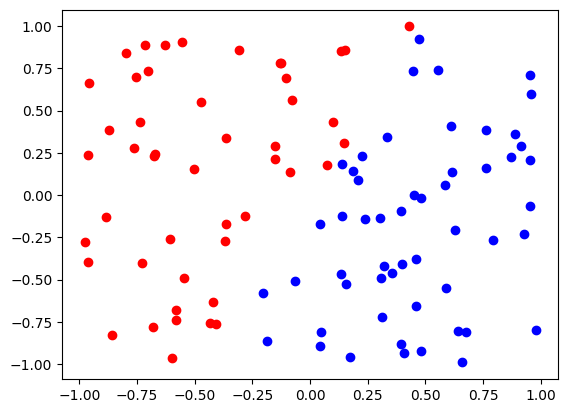

In [49]:
with open('Data/Homework_1/linear_data.pkl', 'rb') as f:
    data = pkl.load(f)
    x, y = data
# plot the data, coloring y = 1 as red and 0 as blueß
plt.figure()
plt.scatter(x[y==1, 0], x[y==1, 1], color='red')
plt.scatter(x[y==0, 0], x[y==0, 1], color='blue')
plt.show()


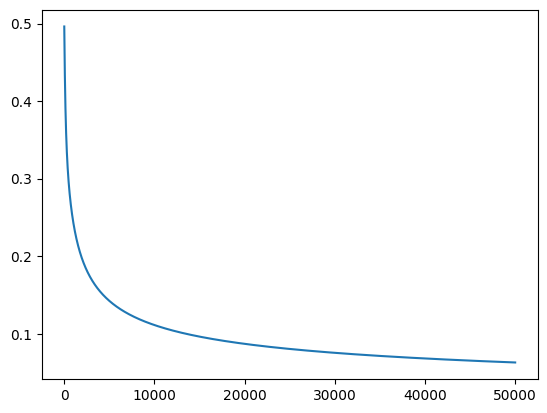

/tmp/ipykernel_1005378/1977428356.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i, j] = sigmoid(np.array([X_mesh[i, j], Y_mesh[i, j]]) @ w + b)
/tmp/ipykernel_1005378/1977428356.py:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


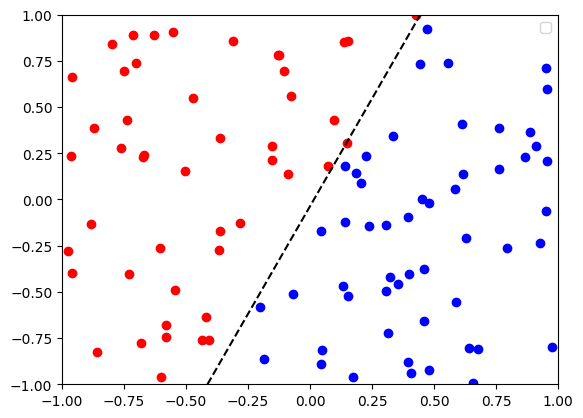

In [55]:
# implement gradient descent on the negative log likelihood yourself
# DO NOT USE TORCH YET
num_iters = 50000
lr = 0.02

# initialize the weights
w = np.random.randn(2)
b = np.random.randn(1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def nll(x, y, w, b):
    pred = sigmoid(x @ w + b)
    return -np.mean(y * np.log(pred + 1e-15) + (1 - y) * np.log(1 - pred + 1e-15))

losses = []
for i in range(num_iters):
    # forward pass
    pred = sigmoid(x @ w + b)
    loss = nll(x, y, w, b)
    losses.append(loss)

    # backward pass
    grad_w = np.mean((pred - y)[:, None] * x, axis=0)
    grad_b = np.mean(pred - y)
    
    # update weights
    w -= lr * grad_w
    b -= lr * grad_b

plt.figure()
plt.plot(losses)
plt.show()

# plot the decision boundary. This will grid over the space and evaluate the model at each point. It then plots the boundary corresponding to where the model
# predicts a 50% probability of being in class 1
plt.figure()
plt.scatter(x[y==1, 0], x[y==1, 1], color='red')
plt.scatter(x[y==0, 0], x[y==0, 1], color='blue')
x_space = np.linspace(-1, 1, 100)
y_space = np.linspace(-1, 1, 100)
X_mesh, Y_mesh = np.meshgrid(x_space, y_space)
Z = np.zeros_like(X_mesh)
for i in range(100):
    for j in range(100):
        Z[i, j] = sigmoid(np.array([X_mesh[i, j], Y_mesh[i, j]]) @ w + b)
# create a level 0 contour with a label
plt.contour(X_mesh, Y_mesh, Z, levels=[0.5], colors='black', linestyles='dashed')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend()
plt.show()


In [42]:
# for your convenience, here are the graphs corresponding to the right answer
print(w)

[-1.80833151  0.52371183]


In [39]:
sigmoid(np.array([x_space[0], y_space[0]]) @ w + b)

array([0.71631494])